In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as T
import matplotlib.pyplot as plt

from collections import OrderedDict

from pathlib import Path
from PIL import Image

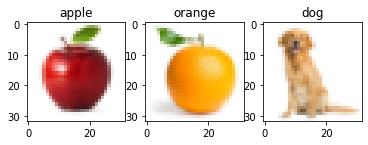

In [2]:
equalize = T.Compose([
    T.Resize(32),
    T.CenterCrop(32),
])

image_names = ["apple", "orange", "dog"]
images = map(lambda image_name: Image.open(f"{image_name}.jpg").convert("RGB"), image_names)
images = dict(zip(image_names, map(equalize, images)))

for i, (name, image) in enumerate(images.items(), start=1):
    plt.subplot(1,len(images),i)
    plt.title(name)
    plt.imshow(image)
plt.show()

In [26]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d( 3, 64, 5)
        self.conv2 = nn.Conv2d(64, 64, 5)
        self.conv3 = nn.Conv2d(64, 64, 5)
        self.conv4 = nn.Conv2d(64, 64, 5)
        self.conv5 = nn.Conv2d(64, 64, 5)
        self.conv6 = nn.Conv2d(64, 64, 5)
        self.fc1 = nn.Linear(64*8*8, 2)
        self.fc2 = nn.Linear(2, 3)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x)).ravel()
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

model = ConvNet()
model(T.ToTensor()(images['apple']))

tensor([ 0.0339, -0.3440, -0.0103], grad_fn=<AddBackward0>)